In [36]:
import sys
sys.path.append('C:/Anaconda3/Lib/site-packages')

import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook

### Image processing

- fixing
    - find close matching images where one is masked and the other is not
    - copy mask/empy mask (try both ways)
- optimizing
    - crop images to include only upper right

In [103]:
# Load images into dictionary where the keys
# represent patients (first label on training images)

def load_cv2_images(folder):
    imgs, masks, img_ids = {}, {}, {}
    for i in range(47):
        imgs[i+1] = []
        masks[i+1] = []
        img_ids[i+1] = []
    
    paths = glob.glob(os.path.join(folder, '*.tif'))
    paths = [p for p in paths if 'mask' not in p]
    
    for p in paths:
        # Read in greyscale images
        index = int(p.split('\\')[1].split('_')[0])
        imgs[index].append(cv2.imread(p, 0))
        masks[index].append(cv2.imread(p[:-4]+'_mask.tif', 0))
        img_ids[index].append(p.split('\\')[1])
    
    for i in range(47):
        imgs[i+1] = np.array(imgs[i+1])
        masks[i+1] = np.array(masks[i+1])
    
    return imgs, masks, img_ids
    
imgs, masks, img_ids = load_cv2_images('imgs')

In [104]:
imgs.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [105]:
imgs[1].shape, masks[1].shape

((120, 420, 580), (120, 420, 580))

In [116]:
# The function below will find any
# image similar to the input image

def find_pairs(compare_img, compare_mask,
               imgs, masks, compare_index, matches):

    for i, (img, mask) in enumerate(zip(imgs, masks)):
        if np.abs(compare_img - img).sum() < 20000000 \
        and i != compare_index \
        and (compare_mask.sum() == 0) != (mask.sum() == 0):
            matches.append((compare_img, compare_mask, img, mask))

    return matches

matches = []
for j in tqdm_notebook(range(47)):
    for i, (img, mask) in enumerate(zip(imgs[j+1], masks[j+1])):
        matches = find_pairs(img, mask,
                             imgs[j+1], masks[j+1],
                             i, matches)
        
len(matches)

282

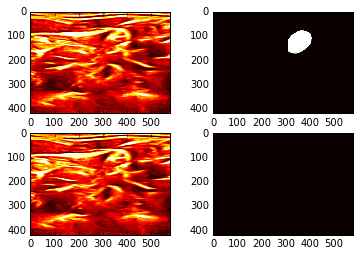

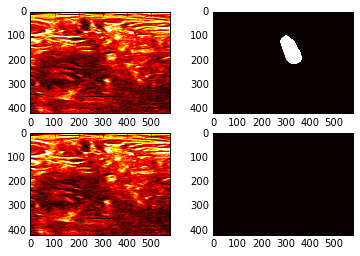

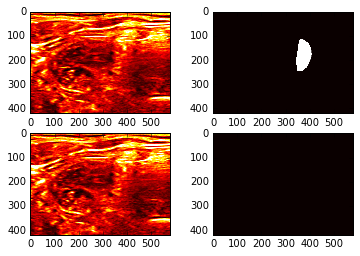

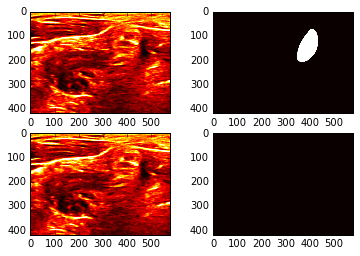

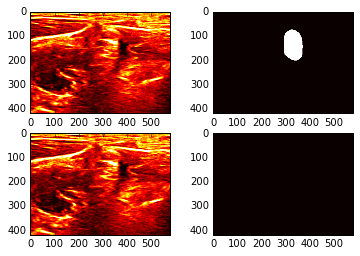

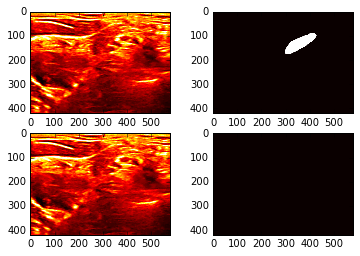

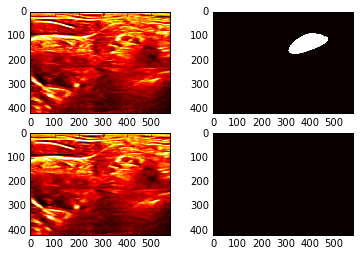

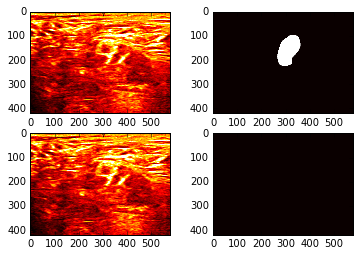

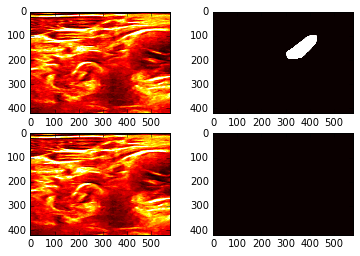

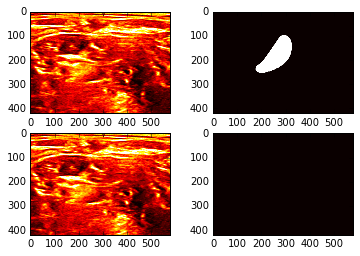

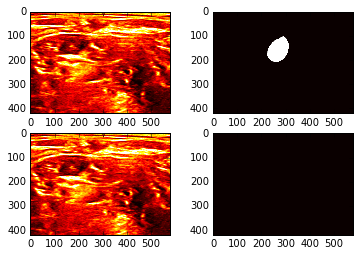

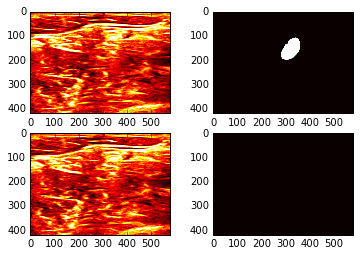

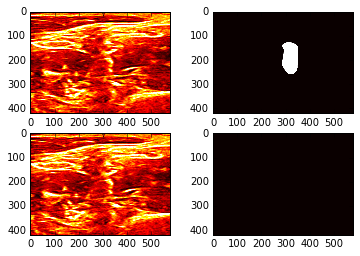

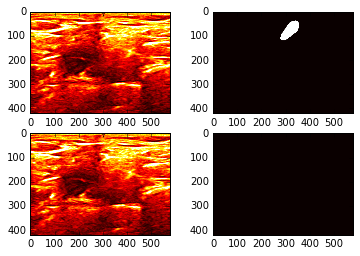

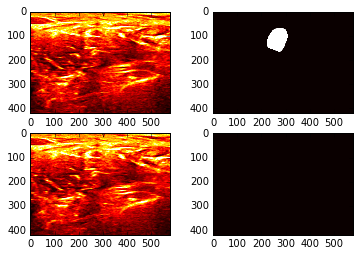

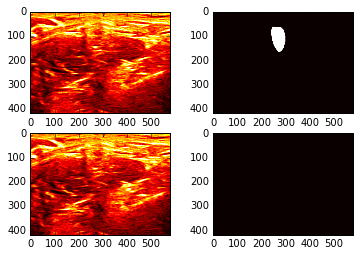

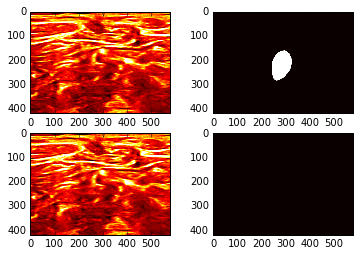

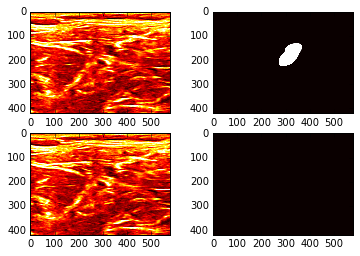

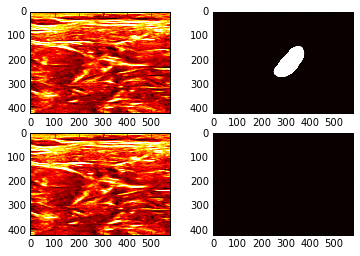

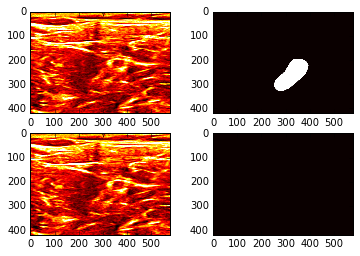

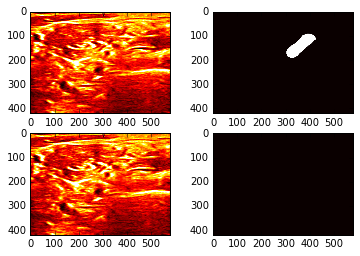

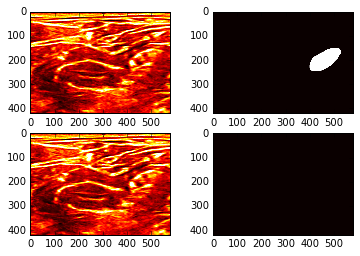

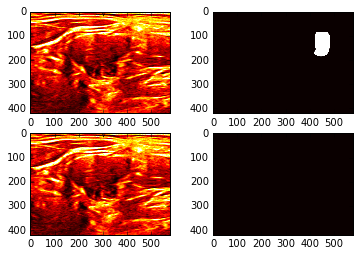

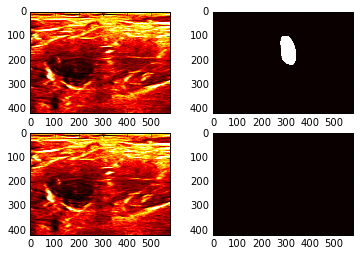

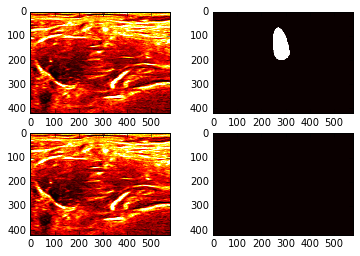

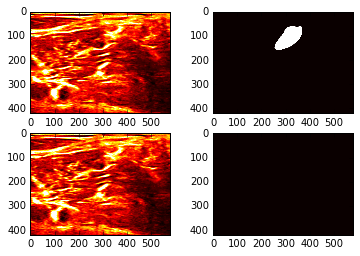

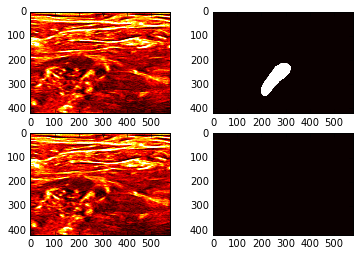

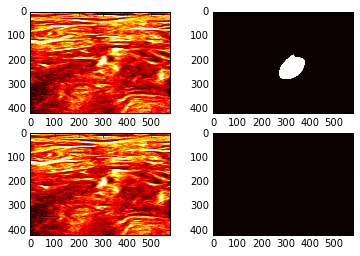

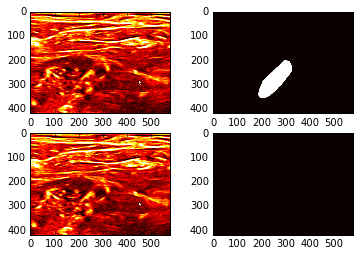

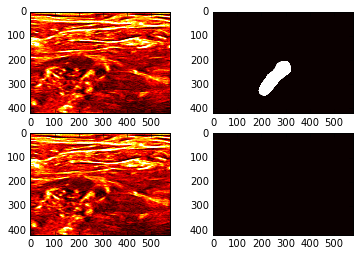

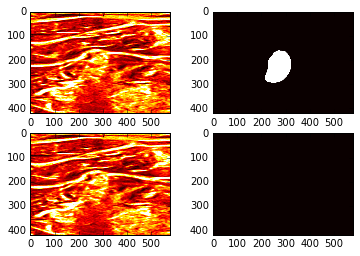

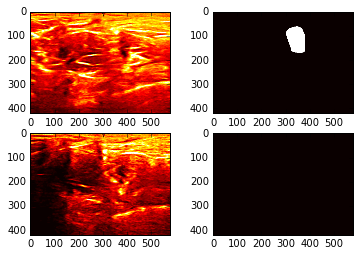

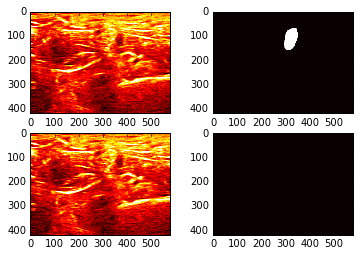

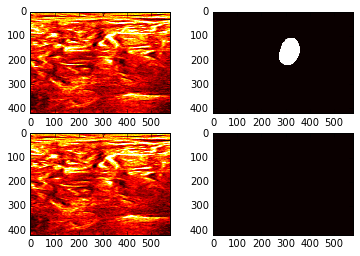

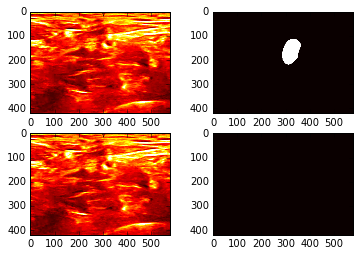

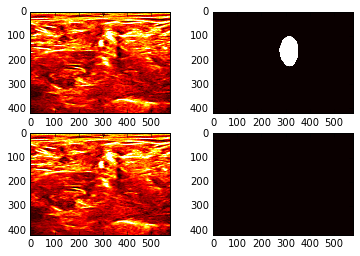

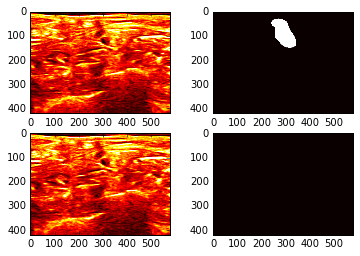

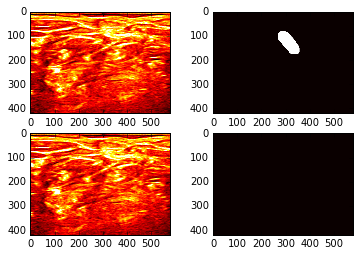

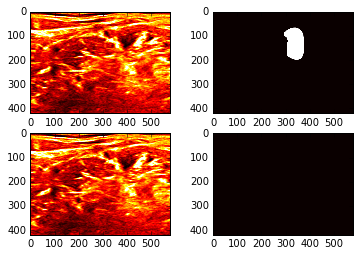

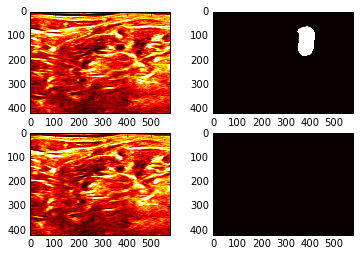

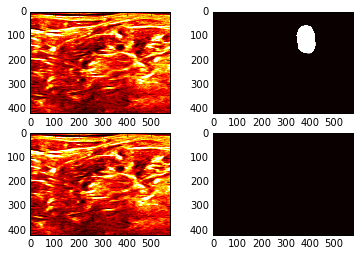

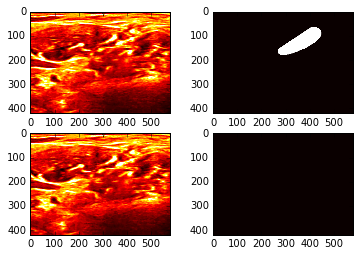

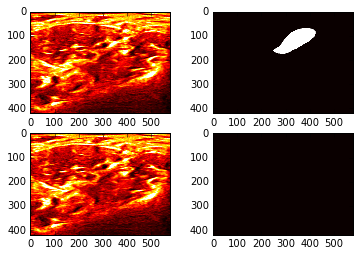

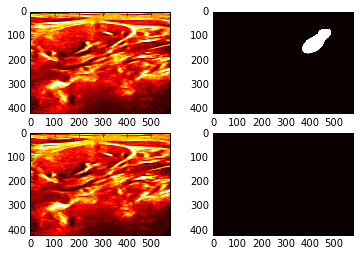

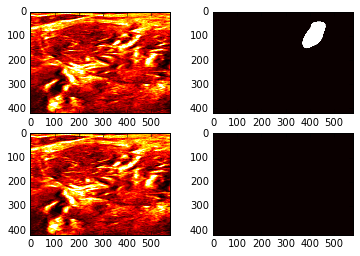

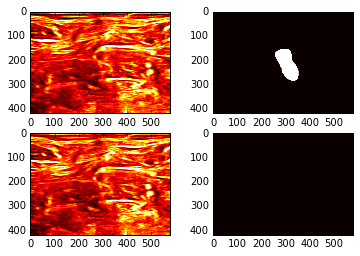

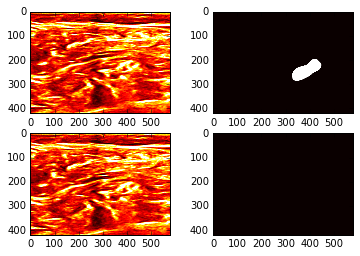

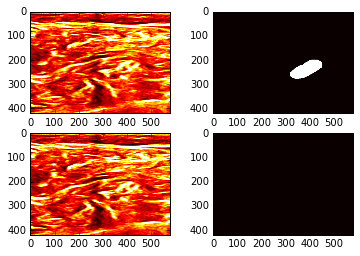

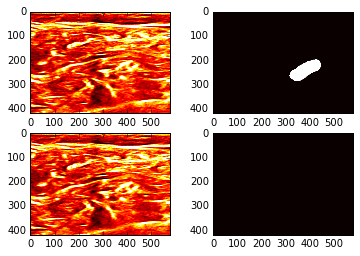

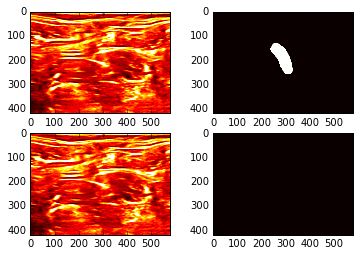

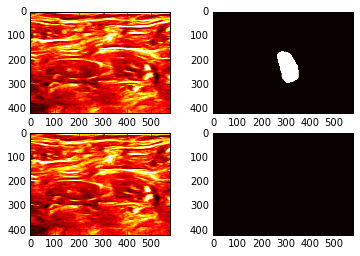

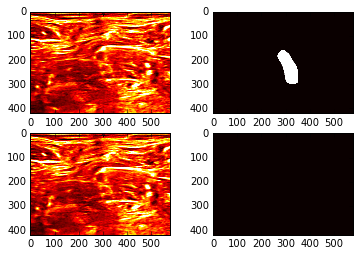

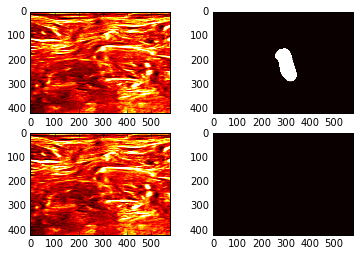

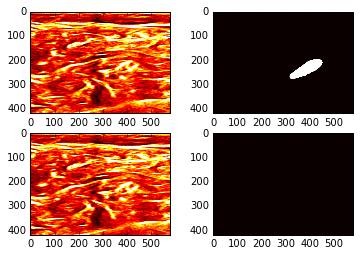

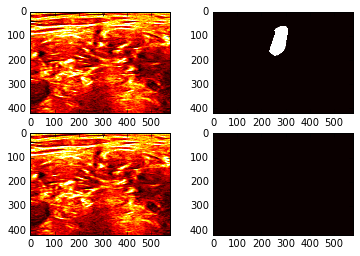

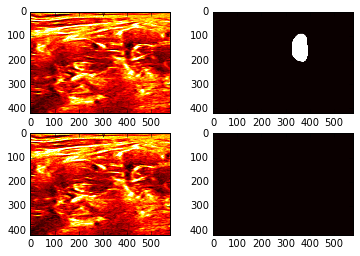

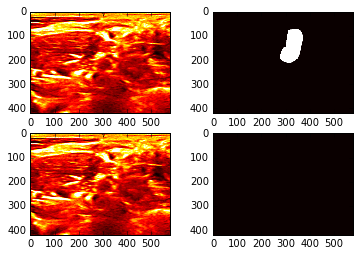

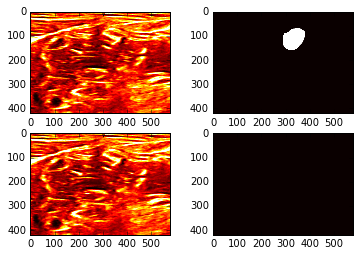

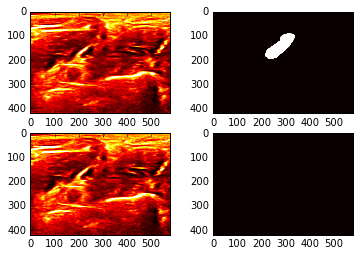

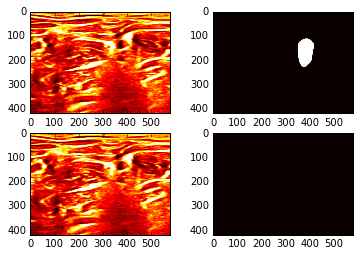

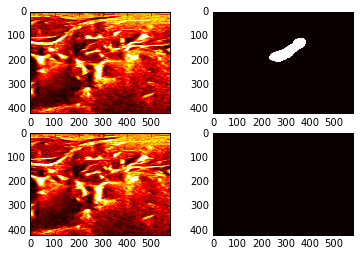

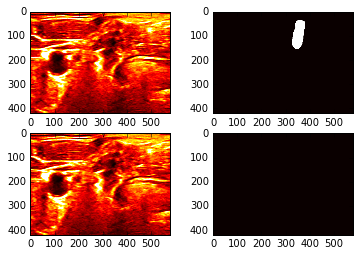

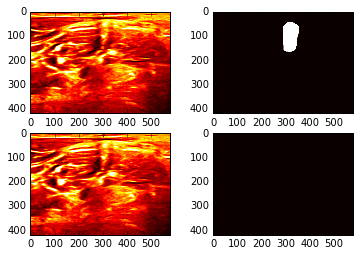

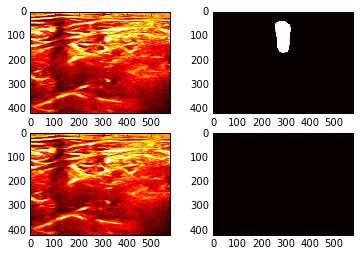

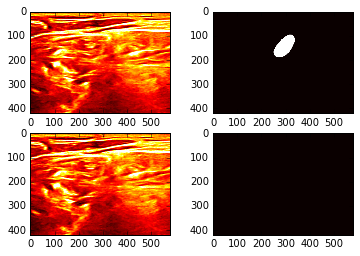

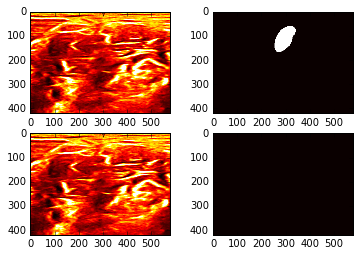

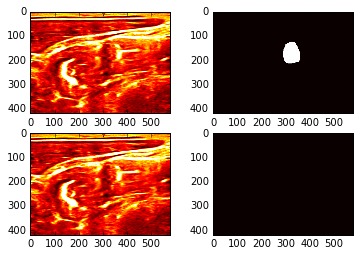

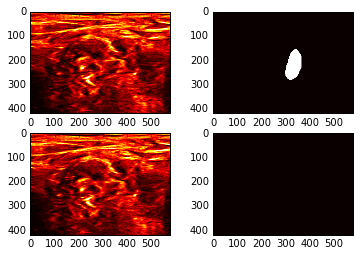

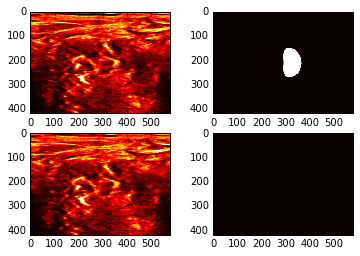

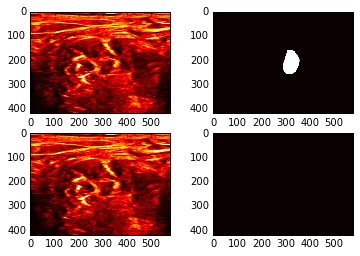

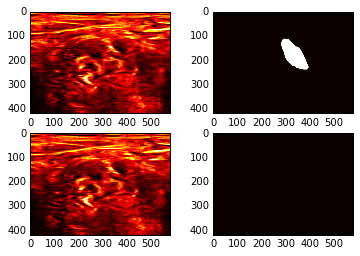

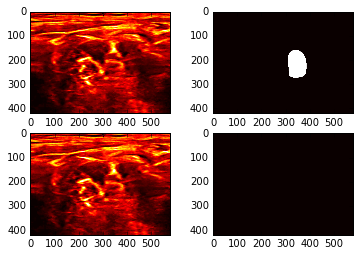

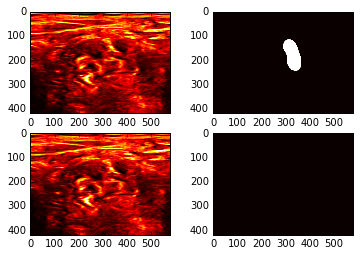

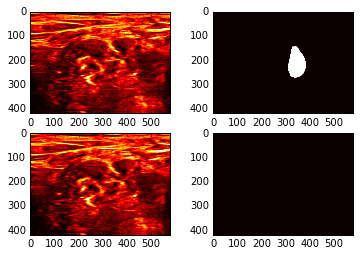

In [118]:
# Print the matches, avoiding duplicates

repeats, unique = [], []
for m in matches:
    # Using m[0].sum() as an ID for the picture
    if m[0].sum() not in repeats\
    and m[2].sum() not in repeats:
        unique.append(m[0].sum())
        fig, ax = plt.subplots(2, 2)
        if m[1].sum() == 0:
            i1, i2 = 1, 0
        else:
            i1, i2 = 0, 1
        ax[i1][0].imshow(m[0], cmap='hot')
        ax[i1][1].imshow(m[1], cmap='hot')
        ax[i2][0].imshow(m[2], cmap='hot')
        ax[i2][1].imshow(m[3], cmap='hot')
        plt.show()
    repeats.append(m[0].sum())
    repeats.append(m[2].sum())

# # Print the matches, avoiding duplicates

# repeats, unique = [], []
# for m in matches:
#     if m[0].sum() not in repeats:
#         fig, ax = plt.subplots(2, 2)
#         # Make sure mask is plced in top right panel
#         if m[1].sum() == 0:
#             index_1, index_2 = 1, 0
#         else:
#             index_1, index_2 = 0, 1
#         ax[index_1][0].imshow(m[0], cmap='hot')
#         ax[index_1][1].imshow(m[1], cmap='hot')
        
#         ax[index_2][0].imshow(m[2], cmap='hot')
#         ax[index_2][1].imshow(m[3], cmap='hot')
#         unique.append(m[0].sum())
#         plt.show()
#     repeats.append(m[0].sum())

In [100]:
# Number of cases found
len(unique), '{0:.2f}%'.format(100*len(unique)/len([]))

NameError: name 'paths' is not defined